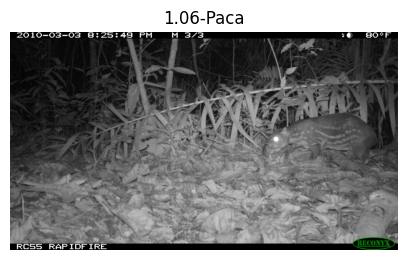

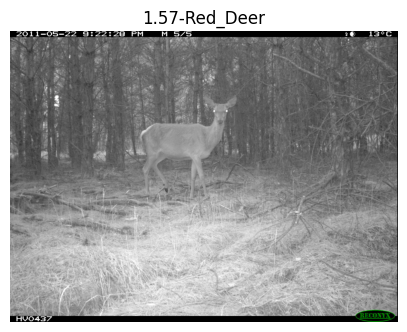

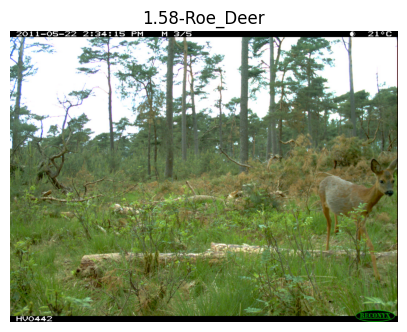

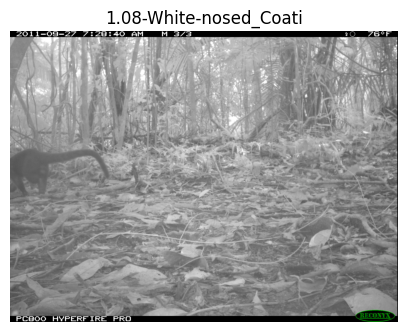

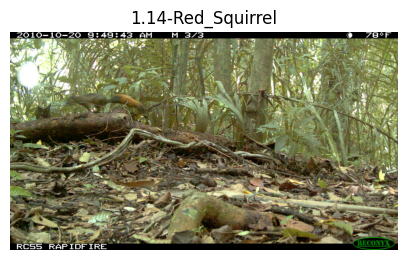

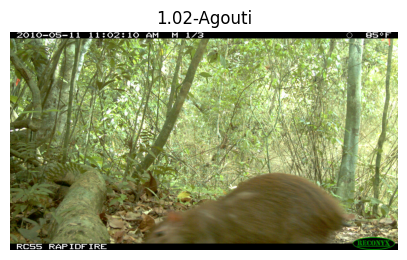

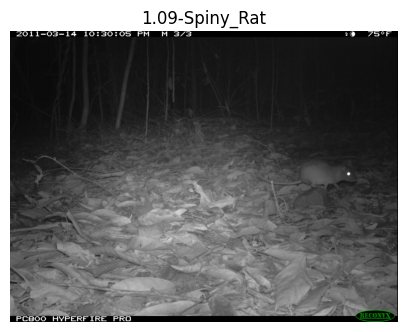

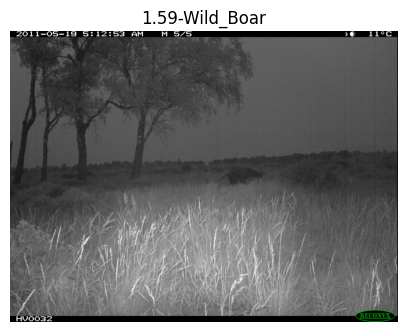

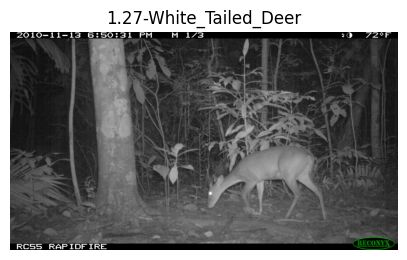

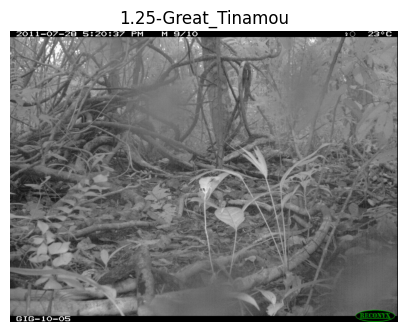

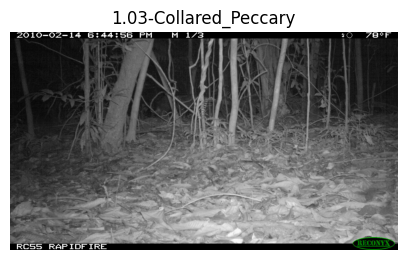

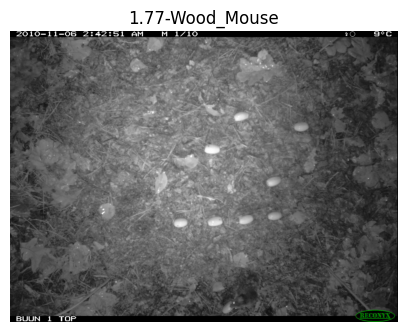

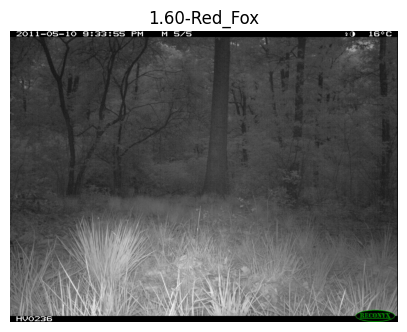

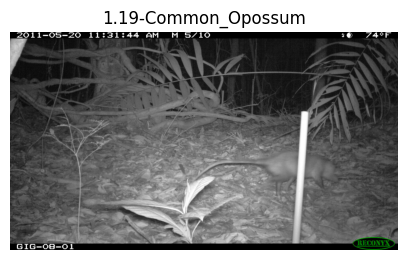

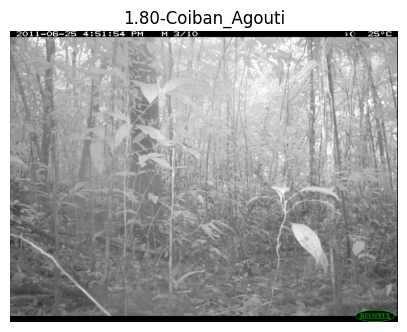

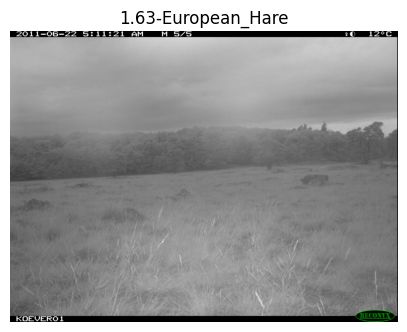

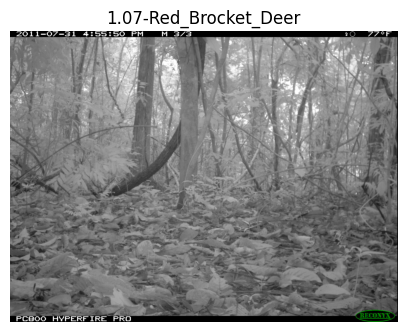

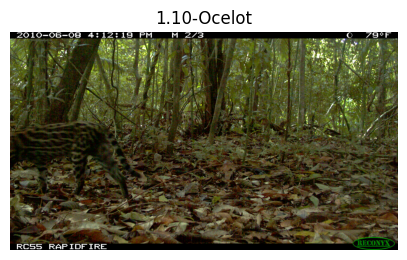

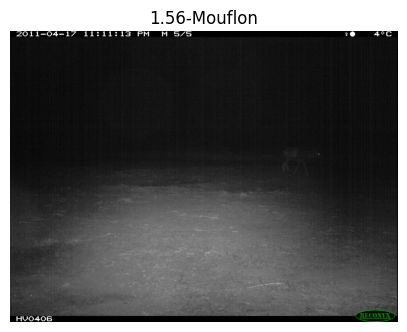

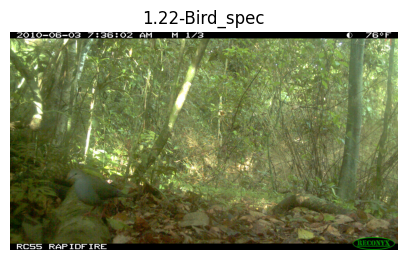

In [1]:
import json
import os
from PIL import Image
import matplotlib.pyplot as plt

# Path to the JSON file containing metadata
json_file_path = r'C:\Users\krrah\Downloads\missouri_camera_traps_images\missouri_camera_traps_set1.json'
# Root directory where the images are stored
images_root_dir = r'C:\Users\krrah\Downloads\missouri_camera_traps_images'

# Load JSON metadata
with open(json_file_path, 'r') as file:
    metadata = json.load(file)

# Dictionary to hold the first image path of each species
species_first_image = {}

# Loop through each image in the JSON metadata
for item in metadata['images']:
    species_name = item['file_name'].split('/')[1]  # Extract species name from the file path
    if species_name not in species_first_image:
        # Store the first encountered image path for each species
        species_first_image[species_name] = os.path.join(images_root_dir, item['file_name'])

# Display the first image of each species
for species, image_path in species_first_image.items():
    try:
        img = Image.open(image_path)
        plt.figure(figsize=(5, 5))
        plt.imshow(img)
        plt.title(species)
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")



1.06-Paca: 1196
1.57-Red_Deer: 2830
1.58-Roe_Deer: 1271
1.08-White-nosed_Coati: 1295
1.14-Red_Squirrel: 639
1.02-Agouti: 950
1.09-Spiny_Rat: 712
1.59-Wild_Boar: 1883
1.27-White_Tailed_Deer: 2208
1.25-Great_Tinamou: 1203
1.03-Collared_Peccary: 938
1.77-Wood_Mouse: 1350
1.60-Red_Fox: 501
1.19-Common_Opossum: 917
1.80-Coiban_Agouti: 1400
1.63-European_Hare: 700
1.07-Red_Brocket_Deer: 982
1.10-Ocelot: 539
1.56-Mouflon: 2365
1.22-Bird_spec: 794


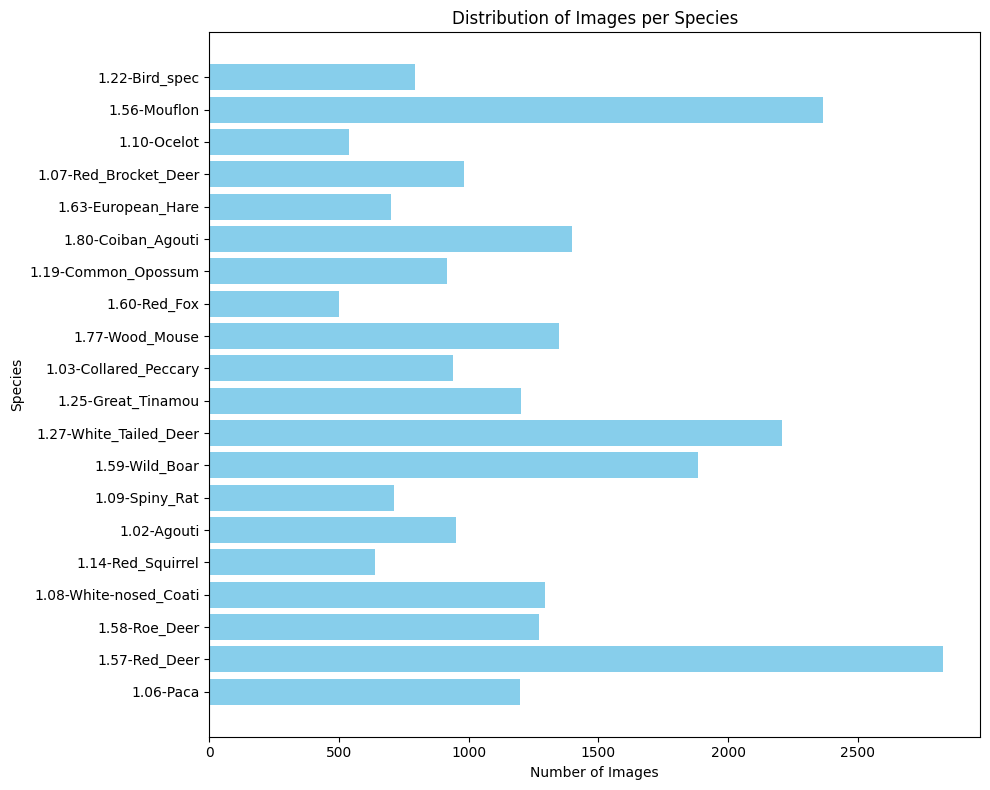

In [2]:
import json

# Initialize a dictionary to count the number of images per species
species_image_count = {}

# Loop through each image in the JSON metadata to count images per species
for item in metadata['images']:
    species_name = item['file_name'].split('/')[1]  
    if species_name in species_image_count:
        species_image_count[species_name] += 1
    else:
        species_image_count[species_name] = 1

# Display the number of images per species
for species, count in species_image_count.items():
    print(f"{species}: {count}")

import matplotlib.pyplot as plt

species_names = list(species_image_count.keys())
image_counts = list(species_image_count.values())

plt.figure(figsize=(10, 8))
plt.barh(species_names, image_counts, color='skyblue')
plt.xlabel('Number of Images')
plt.ylabel('Species')
plt.title('Distribution of Images per Species')
plt.tight_layout()
plt.show()


In [3]:
import json
import os
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Path to the JSON file containing metadata
json_file_path = r'C:\Users\krrah\Downloads\missouri_camera_traps_images\missouri_camera_traps_set1.json'
# Root directory where the images are stored
images_root_dir = r'C:\Users\krrah\Downloads\missouri_camera_traps_images'

# Load JSON metadata
with open(json_file_path, 'r') as file:
    metadata = json.load(file)

# Lists to hold image paths and their corresponding species names
image_paths = []
species_names = []

# Loop through each image in the JSON metadata
for item in metadata['images']:
    # Extract species name from the file path
    species_name = item['file_name'].split('/')[1]
    # Append the full image path and species name to their respective lists
    image_paths.append(os.path.join(images_root_dir, item['file_name']))
    species_names.append(species_name)

# First split to separate out the test set
X_train_val, X_test, y_train_val, y_test = train_test_split(image_paths, species_names, test_size=0.2, random_state=42)

# Second split to separate out the validation set from the training set
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

print(f"Training set: {len(X_train)} images")
print(f"Validation set: {len(X_val)} images")
print(f"Test set: {len(X_test)} images")


Training set: 14803 images
Validation set: 4935 images
Test set: 4935 images


In [4]:
import os
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

class CustomImageDataset(Dataset):
    def __init__(self, img_paths, labels, transform=None):
        """
        Args:
            img_paths (list): List of paths to the images.
            labels (list): List of labels for the images.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.img_paths = img_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        image = Image.open(img_path).convert("RGB") 
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((32, 32)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
image_paths = []
labels = []
species_to_label = {} 
label_counter = 0

for item in metadata['images']:
    species_name = item['file_name'].split('/')[1] 
    img_path = os.path.join(images_root_dir, item['file_name'])
    image_paths.append(img_path)

    if species_name not in species_to_label:
        species_to_label[species_name] = label_counter
        label_counter += 1
    labels.append(species_to_label[species_name])

In [5]:
import torch
class CustomImageDataset(torch.utils.data.Dataset):
    def __init__(self, img_paths, labels, transform=None):
        self.img_paths = img_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        try:
            img_path = self.img_paths[idx]
            image = Image.open(img_path).convert("RGB") 
            label = self.labels[idx]
            if self.transform:
                image = self.transform(image)
            return image, label
        except IOError:
            print(f"Warning: Skipping corrupted image: {img_path}")
            return None  


In [6]:
train_dataset = CustomImageDataset(img_paths=image_paths, labels=labels, transform=data_transforms['train'])
val_dataset = CustomImageDataset(img_paths=image_paths, labels=labels, transform=data_transforms['val'])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

dataloaders = {'train': train_loader, 'val': val_loader}


In [7]:
import torch
import torch.nn as nn
from torchvision import models
model = models.resnet50(pretrained=True)
num_ftrs = model.fc.in_features

model.fc = nn.Linear(num_ftrs, len(species_to_label))

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)


c:\Users\krrah\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\krrah\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [8]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


In [8]:
from PIL import ImageFile, Image
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [11]:
num_epochs = 10
for epoch in range(num_epochs):
    for phase in ['train', 'val']:
        if phase == 'train':
            model.train()  # Set model to training mode
        else:
            model.eval()   # Set model to evaluate mode

        running_loss = 0.0
        running_corrects = 0

        # Iterate over data.
        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward
            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                # Backward + optimize only if in training phase
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            # Statistics
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
        epoch_loss = running_loss / len(dataloaders[phase].dataset)
        epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')


train Loss: 1.1998 Acc: 0.6223
val Loss: 0.5726 Acc: 0.8140
train Loss: 0.5702 Acc: 0.8110
val Loss: 0.3015 Acc: 0.8994
train Loss: 0.3774 Acc: 0.8728
val Loss: 0.2053 Acc: 0.9297
train Loss: 0.2749 Acc: 0.9083
val Loss: 0.1319 Acc: 0.9536
train Loss: 0.2066 Acc: 0.9321
val Loss: 0.1185 Acc: 0.9594
train Loss: 0.1682 Acc: 0.9423
val Loss: 0.0834 Acc: 0.9726
train Loss: 0.1457 Acc: 0.9505
val Loss: 0.0746 Acc: 0.9751
train Loss: 0.1074 Acc: 0.9641
val Loss: 0.0581 Acc: 0.9799
train Loss: 0.0885 Acc: 0.9704
val Loss: 0.0669 Acc: 0.9747
train Loss: 0.0904 Acc: 0.9705
val Loss: 0.0349 Acc: 0.9877


In [35]:
def evaluate_model(model, dataloaders, device):
    model.eval()  # Set model to evaluation mode
    true_labels = []
    pred_labels = []
    
    with torch.no_grad():
        for inputs, labels in dataloaders['val']:  
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            
            true_labels.extend(labels.cpu().numpy())
            pred_labels.extend(preds.cpu().numpy())
    
    return true_labels, pred_labels


In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt

true_labels, pred_labels = evaluate_model(model, dataloaders, device)

# Calculate FDR
FP = np.sum((np.array(pred_labels) == 1) & (np.array(true_labels) == 0))
TP = np.sum((np.array(pred_labels) == 1) & (np.array(true_labels) == 1))
FDR = FP / (FP + TP)
print(f"FDR: {FDR:.4f}")

# Calculate and print the overall accuracy
overall_accuracy = accuracy_score(true_labels, pred_labels)
print(f"Overall Accuracy: {overall_accuracy:.4f}")

FDR: 0.0000
Overall Accuracy: 0.9877


In [17]:
report = classification_report(true_labels, pred_labels, target_names=list(species_to_label.keys()))

print(report)

                        precision    recall  f1-score   support

             1.06-Paca       0.98      0.95      0.97      1196
         1.57-Red_Deer       1.00      1.00      1.00      2830
         1.58-Roe_Deer       1.00      0.99      0.99      1271
1.08-White-nosed_Coati       1.00      0.99      0.99      1295
     1.14-Red_Squirrel       1.00      1.00      1.00       639
           1.02-Agouti       0.99      0.99      0.99       950
        1.09-Spiny_Rat       0.92      0.98      0.95       712
        1.59-Wild_Boar       1.00      1.00      1.00      1883
1.27-White_Tailed_Deer       0.99      1.00      0.99      2208
    1.25-Great_Tinamou       1.00      1.00      1.00      1203
 1.03-Collared_Peccary       0.98      0.97      0.97       938
       1.77-Wood_Mouse       1.00      1.00      1.00      1350
          1.60-Red_Fox       0.94      0.96      0.95       501
   1.19-Common_Opossum       0.98      0.97      0.97       917
    1.80-Coiban_Agouti       1.00      

In [23]:
torch.save(model.state_dict(), 'model_weights.pth')

Loading the Model
When you want to load the model, you first need to recreate the model architecture in code and then load the state dictionary into this model.

In [14]:
import torch
import torch.nn as nn
from torchvision import models
model = models.resnet50(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(species_to_label)) 

# Load the saved model weights
model.load_state_dict(torch.load('model_weights.pth'))

model.eval()


c:\Users\krrah\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\krrah\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

<Figure size 1000x1000 with 0 Axes>

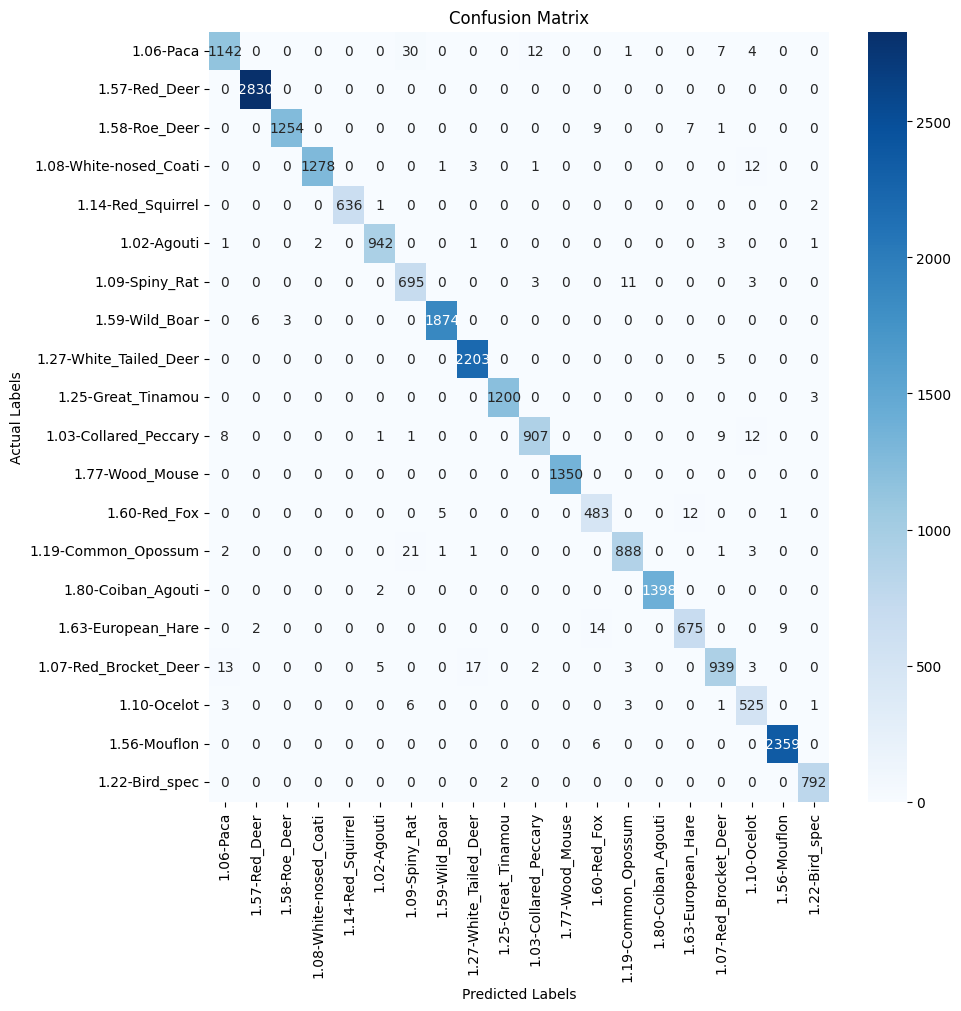

In [18]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
plt.figure(figsize=(10,10))
# Generate a Confusion Matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=species_to_label.keys(), yticklabels=species_to_label.keys())
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()


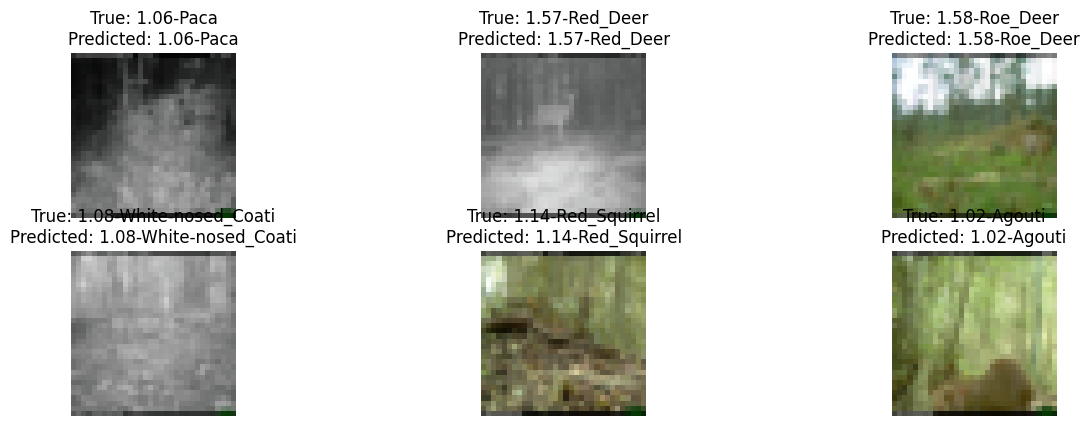

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
    
def display_unique_species_predictions(model, dataloader, device, class_names, target_species_count=3, num_images_per_species=3):
    model.eval()  # Set the model to evaluation mode
    species_displayed = set()
    images_displayed = 0

    plt.figure(figsize=(15, 15))

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for idx in range(inputs.size(0)):
                label = labels[idx].item()
                pred = preds[idx].item()
                
               
                if class_names[label] in species_displayed:
                    continue

                images_displayed += 1
                species_displayed.add(class_names[label])
                
                ax = plt.subplot(target_species_count, num_images_per_species, images_displayed)
                ax.axis('off')
                ax.set_title(f'True: {class_names[label]}\nPredicted: {class_names[pred]}')

                # Convert tensor image to numpy for display
                img = inputs.cpu().data[idx].numpy().transpose((1, 2, 0))
                mean = np.array([0.485, 0.456, 0.406])
                std = np.array([0.229, 0.224, 0.225])
                img = std * img + mean
                img = np.clip(img, 0, 1)
                plt.imshow(img)

                if len(species_displayed) == target_species_count:
                    plt.show()
                    return
                elif images_displayed % num_images_per_species == 0:
                    break  

label_to_species = {v: k for k, v in species_to_label.items()}
class_names = list(label_to_species.values())
display_unique_species_predictions(model, dataloaders['val'], device, class_names, target_species_count=6, num_images_per_species=3)

 # Initialize VGG16 Model

In [11]:
# Define the VGG16 model
model_vgg = models.vgg16(pretrained=True)

num_ftrs = model_vgg.classifier[6].in_features
model_vgg.classifier[6] = nn.Linear(num_ftrs, len(species_to_label))  

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_vgg = model_vgg.to(device)

# Specify the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_vgg.parameters(), lr=0.001, momentum=0.9)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\krrah/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100.0%


# Training and Validation Loops

In [12]:
num_epochs = 10
for epoch in range(num_epochs):
    for phase in ['train', 'val']:
        if phase == 'train':
            model_vgg.train()  
        else:
            model_vgg.eval()   

        running_loss = 0.0
        running_corrects = 0

        # Iterate over data.
        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward
            with torch.set_grad_enabled(phase == 'train'):
                outputs = model_vgg(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                # Backward + optimize only if in training phase
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            # Statistics
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
        epoch_loss = running_loss / len(dataloaders[phase].dataset)
        epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

train Loss: 1.1598 Acc: 0.6155
val Loss: 0.6210 Acc: 0.7800
train Loss: 0.5567 Acc: 0.8136
val Loss: 0.3844 Acc: 0.8697
train Loss: 0.3549 Acc: 0.8820
val Loss: 0.2283 Acc: 0.9247
train Loss: 0.2475 Acc: 0.9144
val Loss: 0.1899 Acc: 0.9326
train Loss: 0.1924 Acc: 0.9350
val Loss: 0.1294 Acc: 0.9542
train Loss: 0.1393 Acc: 0.9515
val Loss: 0.1194 Acc: 0.9576
train Loss: 0.1195 Acc: 0.9606
val Loss: 0.0604 Acc: 0.9776
train Loss: 0.0899 Acc: 0.9706
val Loss: 0.0608 Acc: 0.9796
train Loss: 0.0747 Acc: 0.9746
val Loss: 0.0640 Acc: 0.9789
train Loss: 0.0689 Acc: 0.9777
val Loss: 0.0467 Acc: 0.9844


#  Evaluate the Model

In [19]:
model_vgg.eval()

# Initialize the prediction and actual label lists
actuals = []
predictions = []

with torch.no_grad():  # Deactivates autograd, reducing memory usage and speeding up computations
    for inputs, labels in dataloaders['val']:
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model_vgg(inputs)
        _, preds = torch.max(outputs, 1)
        
        # Append batch predictions and actuals
        actuals.extend(labels.view_as(preds))
        predictions.extend(preds)

# Convert the lists of tensors to tensors
actuals = torch.stack(actuals)
predictions = torch.stack(predictions)

correct = torch.sum(predictions == actuals).item()
total = actuals.size(0)
accuracy = correct / total

print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.9844


In [16]:
from sklearn.metrics import classification_report

Overall Accuracy: 0.9844


In [17]:
report = classification_report(actuals, predictions, target_names=list(species_to_label.keys()))

print(report)

                        precision    recall  f1-score   support

             1.06-Paca       0.96      0.99      0.98      1196
         1.57-Red_Deer       1.00      1.00      1.00      2830
         1.58-Roe_Deer       1.00      1.00      1.00      1271
1.08-White-nosed_Coati       0.99      1.00      1.00      1295
     1.14-Red_Squirrel       1.00      0.99      0.99       639
           1.02-Agouti       1.00      0.98      0.99       950
        1.09-Spiny_Rat       0.99      0.86      0.92       712
        1.59-Wild_Boar       1.00      1.00      1.00      1883
1.27-White_Tailed_Deer       0.98      1.00      0.99      2208
    1.25-Great_Tinamou       0.99      0.99      0.99      1203
 1.03-Collared_Peccary       0.95      0.96      0.95       938
       1.77-Wood_Mouse       1.00      1.00      1.00      1350
          1.60-Red_Fox       0.97      0.99      0.98       501
   1.19-Common_Opossum       0.94      0.98      0.96       917
    1.80-Coiban_Agouti       1.00      

# Saving and Loading Model

In [ ]:
torch.save(model_vgg.state_dict(), 'model_vgg_weights.pth')

In [18]:
# Loading the model

model_vgg = models.vgg16(pretrained=True) 
model_vgg.classifier[6] = nn.Linear(4096, len(species_to_label))

model_vgg.load_state_dict(torch.load('model_vgg_weights.pth'))
model_vgg.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

# Feature Extraction with ResNet50

In [9]:
from torchvision import models
import torch

# Load the pre-trained ResNet50 model
model = models.resnet50(pretrained=True)

feature_extractor = torch.nn.Sequential(*list(model.children())[:-1])

# Move the model to the appropriate device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
feature_extractor = feature_extractor.to(device)


In [10]:
feature_extractor.eval()  # Set the model to evaluation mode

# Function to extract features
def extract_features(dataloader, feature_extractor):
    features = []
    labels = []
    with torch.no_grad():
        for imgs, lbls in dataloader:
            imgs = imgs.to(device)
            output = feature_extractor(imgs)
            # Flatten the features to a 1D vector per image
            features.extend(output.view(output.size(0), -1).cpu().numpy())
            labels.extend(lbls)
    return features, labels

# Extract features for both training and validation sets
train_features, train_labels = extract_features(dataloaders['train'], feature_extractor)
val_features, val_labels = extract_features(dataloaders['val'], feature_extractor)

# Train the SVM Classifier

In [11]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score

# Create an SVM classifier with RBF kernel
svm_classifier = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=10))

# Train the classifier
svm_classifier.fit(train_features, train_labels)

# Evaluate the classifier
val_predictions = svm_classifier.predict(val_features)
print("Validation Set Accuracy: ", accuracy_score(val_labels, val_predictions))
print("Classification Report:\n", classification_report(val_labels, val_predictions))


Validation Set Accuracy:  0.9868682365338629
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1196
           1       0.99      1.00      1.00      2830
           2       1.00      0.99      0.99      1271
           3       0.98      1.00      0.99      1295
           4       0.99      0.98      0.98       639
           5       0.99      0.98      0.99       950
           6       0.95      0.98      0.96       712
           7       0.99      1.00      1.00      1883
           8       0.99      0.99      0.99      2208
           9       0.99      1.00      1.00      1203
          10       0.97      0.96      0.97       938
          11       1.00      1.00      1.00      1350
          12       1.00      0.96      0.98       501
          13       0.97      0.97      0.97       917
          14       1.00      1.00      1.00      1400
          15       0.99      0.99      0.99       700
          16

# Saving the Feature Extractor Model

In [12]:
torch.save(feature_extractor.state_dict(), 'feature_extractor_resnet50.pth')

# Loading the Feature Extractor Model

In [ ]:
# Load the pre-trained ResNet50 model
model = models.resnet50(pretrained=False)

feature_extractor = torch.nn.Sequential(*list(model.children())[:-1])

# Load the saved feature extractor state
feature_extractor.load_state_dict(torch.load('feature_extractor_resnet50.pth'))

feature_extractor = feature_extractor.to(device)

feature_extractor.eval()  

# Saving the SVM Classifier

In [13]:
import joblib

# Save the SVM classifier
joblib.dump(svm_classifier, 'svm_classifier.pkl')

['svm_classifier.pkl']

# Loading the SVM Classifier

In [ ]:
svm_classifier_loaded = joblib.load('svm_classifier.pkl')

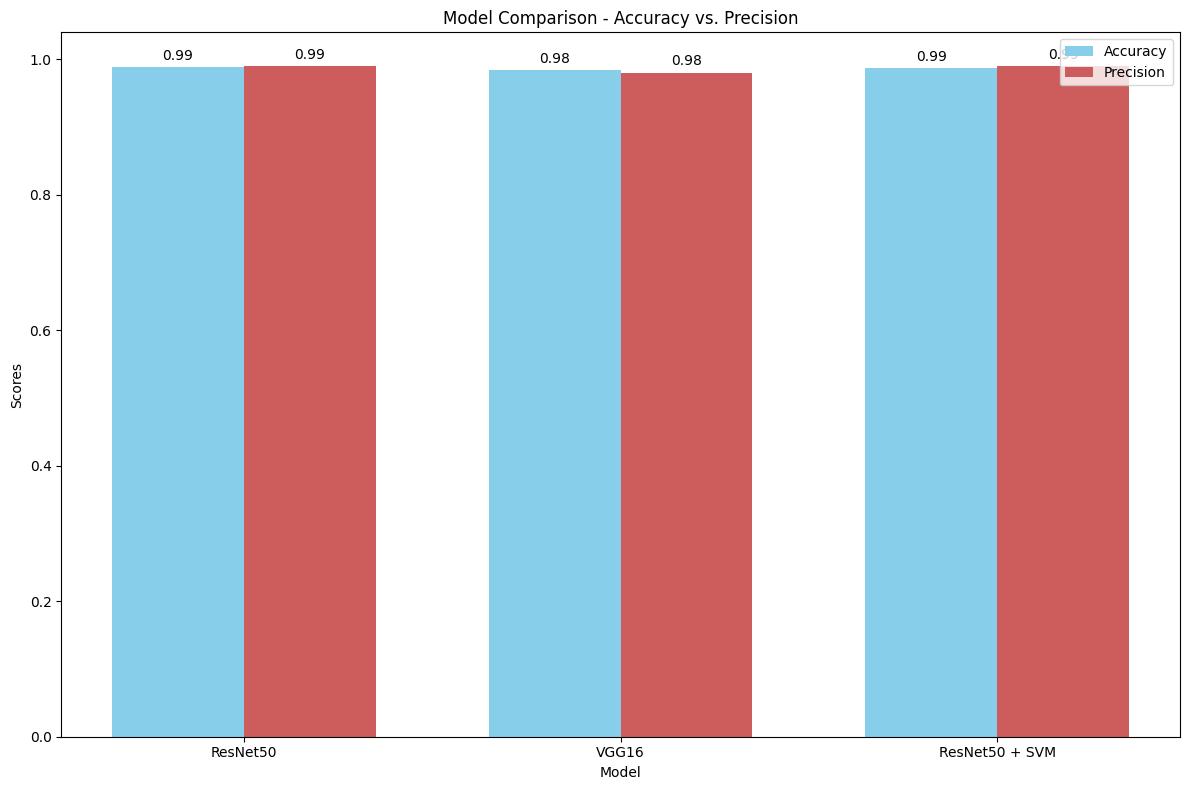

In [21]:
import numpy as np
import matplotlib.pyplot as plt

precision_resnet50 = 0.99  
precision_vgg16 = 0.98     
precision_resnet50_svm = 0.99  

# Model names
models = ['ResNet50', 'VGG16', 'ResNet50 + SVM']

# Accuracy and precision
accuracies = [accuracy_resnet50, accuracy_vgg16, accuracy_resnet50_svm]
precisions = [precision_resnet50, precision_vgg16, precision_resnet50_svm]

x = np.arange(len(models))  
width = 0.35  

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, accuracies, width, label='Accuracy', color='SkyBlue')
rects2 = ax.bar(x + width/2, precisions, width, label='Precision', color='IndianRed')


ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison - Accuracy vs. Precision')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Function to autolabel the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


# previous work

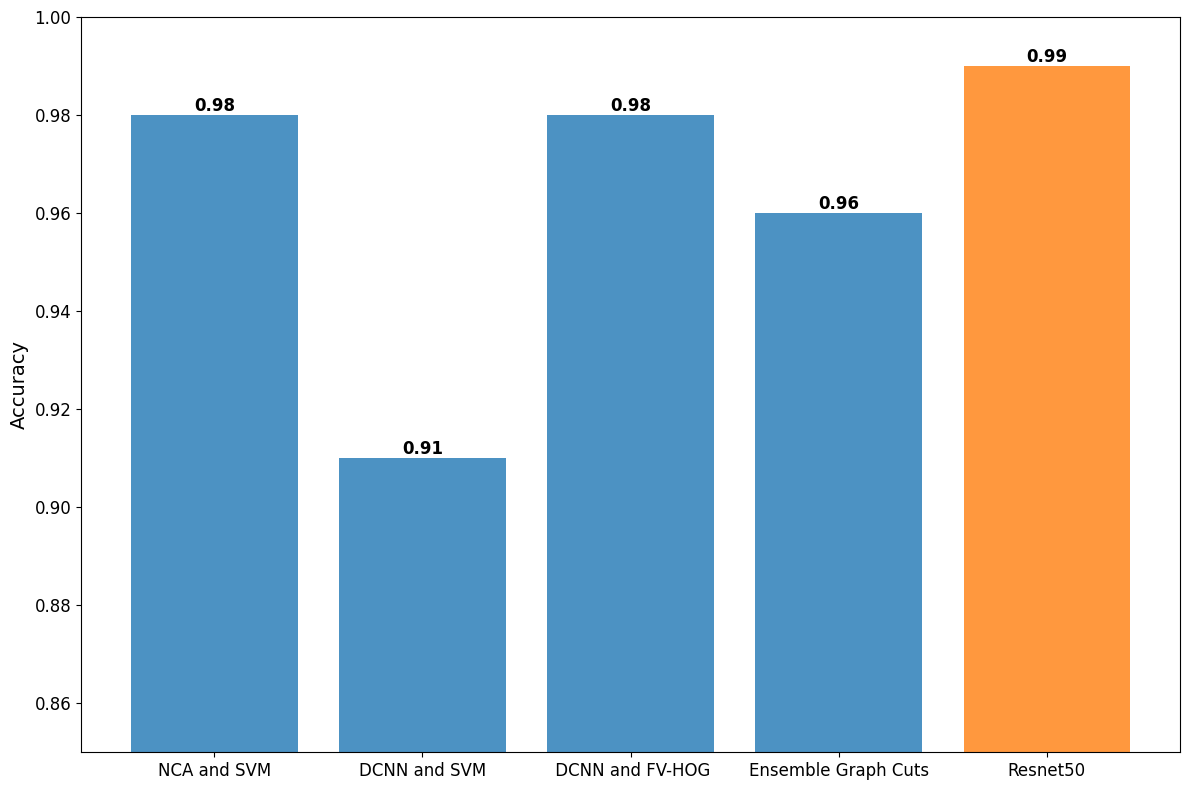

In [1]:
import matplotlib.pyplot as plt

# Names of previous studies and your model
models = ['NCA and SVM', 'DCNN and SVM', ' DCNN and FV-HOG', 'Ensemble Graph Cuts', 'Resnet50']

accuracies = [0.98, 0.91, 0.98, 0.96, 0.99] 

# Set the colors
colors = ['#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#ff7f0e'] 

plt.figure(figsize=(12, 8))


bars = plt.bar(models, accuracies, color=colors, alpha=0.8)

plt.ylabel('Accuracy', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0.85, 1.0])  

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval,2), va='bottom', ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()
